In [14]:
# Base URL of the site to be analyzed
SITE_URL = 'https://es.wikipedia.org/'


### BeautifulSoup


In [140]:
import pandas as pd # library for data analysis
import requests # library to handle requests
from bs4 import BeautifulSoup # library to parse HTML documents

In [141]:
# get the response in the form of html
wikiurl="https://es.wikipedia.org/wiki/Anexo:Presidentes_de_Colombia"
table_class="wikitable"
response=requests.get(wikiurl)
print(response.status_code)

200


In [142]:
soup = BeautifulSoup(response.content, 'html.parser')
indiatable= soup.findAll('table',{'class':"wikitable"})



In [143]:
indiatable

[<table align="center" cellpadding="2" cellspacing="2" class="wikitable" width="100%">
 <tbody><tr style="background-color:#cccccc;">
 <th colspan="2" width="18%"><b>Período</b></th>
 <th width="8%"><b>Efigie</b></th>
 <th width="25%"><b>Presidente</b></th>
 <th width="12%"><b>Ciudades</b>
 </th>
 <th>Alineación</th>
 <th width="30%"><b>Comentarios</b>
 </th></tr>
 <tr>
 <td style="background-color:#536895;">
 </td>
 <td><a href="/wiki/25_de_julio" title="25 de julio">25 de julio</a> de <a href="/wiki/1810" title="1810">1810</a>-<a href="/wiki/1_de_abril" title="1 de abril">1 de abril</a> de <a href="/wiki/1811" title="1811">1811</a></td>
 <td><a class="image" href="/wiki/Archivo:Jos%C3%A9_Miguel_Pey.jpg"><img alt="José Miguel Pey.jpg" data-file-height="300" data-file-width="221" decoding="async" height="136" src="//upload.wikimedia.org/wikipedia/commons/thumb/a/a9/Jos%C3%A9_Miguel_Pey.jpg/100px-Jos%C3%A9_Miguel_Pey.jpg" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/a/a9/Jos%C

In [146]:
df=pd.read_html(str(indiatable))
# convert list to dataframe
df=pd.DataFrame(df[0])
#df.loc[:, ['Período', 'Presidente', 'Partido']] 
df[['Período.1','Presidente','Alineación']]
#print(df.head(50))


,Período.1,Presidente,Alineación
0,25 de julio de 1810-1 de abril de 1811,(e) José Miguel Pey y Andrade (1er. periodo),Centralista
1,1 de abril de 1811-19 de septiembre de 1811,Jorge Tadeo Lozano,Federalista
2,30 de septiembre de 1813-29 de agosto de 1815,Antonio José de Nariño y Álvarez,Centralista
3,23 de diciembre de 1811 -24 de diciembre de 1811,Pedro Groot y Alea,Centralista
4,25 de junio de 1812-5 de agosto de 1812,(e) Manuel Benito de Castro Arcaya,Centralista
5,6 de noviembre de 1812-14 de diciembre de 1812,(e) Juan Dionisio Gamba y Ureña,Centralista
6,27 de octubre de 1812-5 de octubre de 1814,Camilo Torres Tenorio (1er. periodo),Federalista
7,29 de agosto de 1813-12 de diciembre de 1814,Manuel de Bernardo Álvarez del Casal,Centralista
8,5 de octubre de 1814-21 de enero de 1815,(e) José María Del Castillo y Rada,Federalista
9,5 de octubre de 1814-21 de enero de 1815,José Joaquín Camacho y Rodríguez,Federalista


### Librerias

In [147]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt


### Nube de Palabras 

Total words 667.


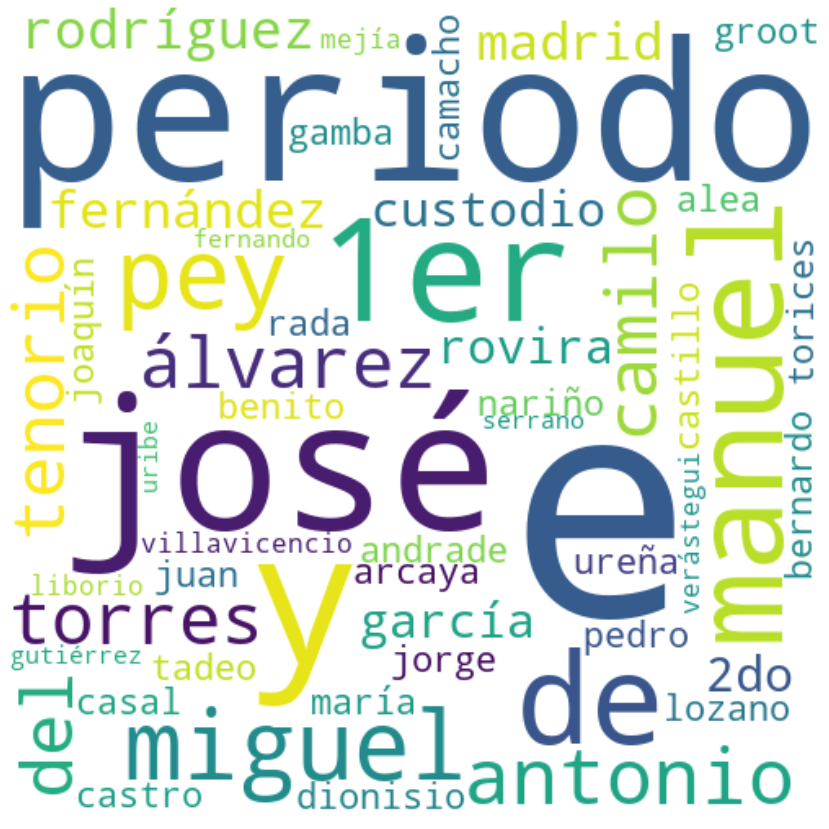

In [148]:
#Obtain all responses
try:
  text = " ".join(str(resp) for resp in df.Presidente)
except Exception as e:
  print(e)
  pass

text = text.lower()
print ("Total words {}.".format(len(text)))

#Generate a word cloud image
wordcloud = WordCloud(background_color="white", width=500, height=500).generate(text)

#Display the generated image
plt.figure(figsize=(15,15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()